<a href="https://colab.research.google.com/github/BZ6/PINDeepLearning/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этой лабораторной работе будут задействованы полносвязные слои. Необходимо решить ряд задач с их помощью.  Набор библиотек: tensorflow, numpy, matplotlib, random

In [ ]:
%pip install tensorflow numpy matplotlib

In [62]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Первая задача - классификация генерированных данных. Для начала сформируйте датасет по следующему принципу: первая группа точек (первый класс) распределена по площади круга радиусом 0.8, вторая группа - по площади кольца с R=2 и r=1. Суммарное количество точек N=1000, соотношение классов - 1:1.

По заданным условиям сгенерируйте две координаты для каждой точки как случайные величины, набор этих координат занесите в массив X_train. Каждой точке из этого массива должен соответствовать лейбл класса - его занесите в y_train. Постройте график распределения.

In [65]:
N = 1000
X_train = np.zeros((N, 2))
y_train = np.zeros(N)

for i in range(N // 2):
    theta = random.uniform(0, 2 * np.pi)

    r = random.uniform(0, 0.8)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    X_train[i] = [x, y]
    y_train[i] = 0

    r = random.uniform(1, 2)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    X_train[i + N // 2] = [x, y]
    y_train[i + N // 2] = 1

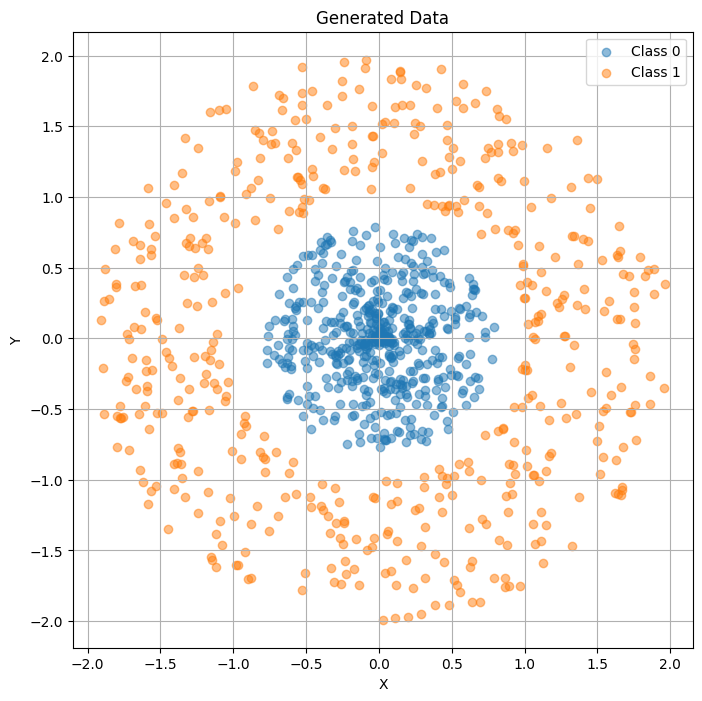

In [66]:
plt.figure(figsize=(8, 8))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Class 1', alpha=0.5)
plt.legend()
plt.title('Generated Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

Классифицируйте эти данные с помощью трех разных моделей, использующих полносвязные слои. Для всех моделей используйте метрику accuracy. Первая модель должна иметь не более двух слоев (включая выходной) и по два нейрона в каждом слое. Во второй модели добавьте к первому слою ещё один нейрон. Последнюю модель составляйте по своему усмотрению с целью максимально быстро добиться 100% точности.

In [67]:
# Модель 1
model_1 = Sequential([
    Input(shape=(2,)),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_1.fit(X_train, y_train, epochs=10, batch_size=32)
loss, accuracy = model_1.evaluate(X_train, y_train)

print()
print(f'Model 1 Accuracy: {accuracy}')

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5038 - loss: 1.1005   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4501 - loss: 1.0835 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4299 - loss: 1.0288 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4163 - loss: 1.0073 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3934 - loss: 0.9647 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3796 - loss: 0.9794 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3746 - loss: 0.9113 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3829 - loss: 0.8794 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3758 - loss: 0.8787 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3519 - loss: 0.8624 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2380 - loss: 0.7834 

Model 1 Accuracy: 0.3440000116825104


In [68]:
# Модель 2
model_2 = Sequential([
    Input(shape=(2,)),
    Dense(3, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2.fit(X_train, y_train, epochs=10, batch_size=32)
loss, accuracy = model_2.evaluate(X_train, y_train)

print()
print(f'Model 2 Accuracy: {accuracy}')

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5051 - loss: 0.8179   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4598 - loss: 0.8182 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4553 - loss: 0.7959 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4317 - loss: 0.7651 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4209 - loss: 0.7580 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4102 - loss: 0.7319 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4251 - loss: 0.7128 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4115 - loss: 0.7171 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5488 - loss: 0.6884 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5381 - loss: 0.6801 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6480 - loss: 0.7090 

Model 2 Accuracy: 0.5479999780654907


In [75]:
# Модель 3
model_3 = Sequential([
    Input(shape=(2,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_3.fit(X_train, y_train, epochs=10, batch_size=32)
loss, accuracy = model_3.evaluate(X_train, y_train)

print()
print(f'Model 3 Accuracy: {accuracy}')

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5094 - loss: 0.6675   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5830 - loss: 0.6324 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6376 - loss: 0.6028 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6811 - loss: 0.5786 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7246 - loss: 0.5559 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7759 - loss: 0.5224 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7984 - loss: 0.4911 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8374 - loss: 0.4762 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8827 - loss: 0.4435 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9268 - loss: 0.4125 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9035 - loss: 0.4733 

Model 3 Accuracy: 0.9399999976158142


Теперь добавьте к данным случайные отклонения по координатам таким образом, чтобы точки двух классов смешивались на границе. Для этого, например, можно добавить к генератору координат слагаемое, разыгранное функцией Гаусса, но принимается любой рабочий вариант. Постройте график.

In [77]:
noise_factor = 0.25
X_train_noisy = X_train + noise_factor * np.random.randn(*X_train.shape)

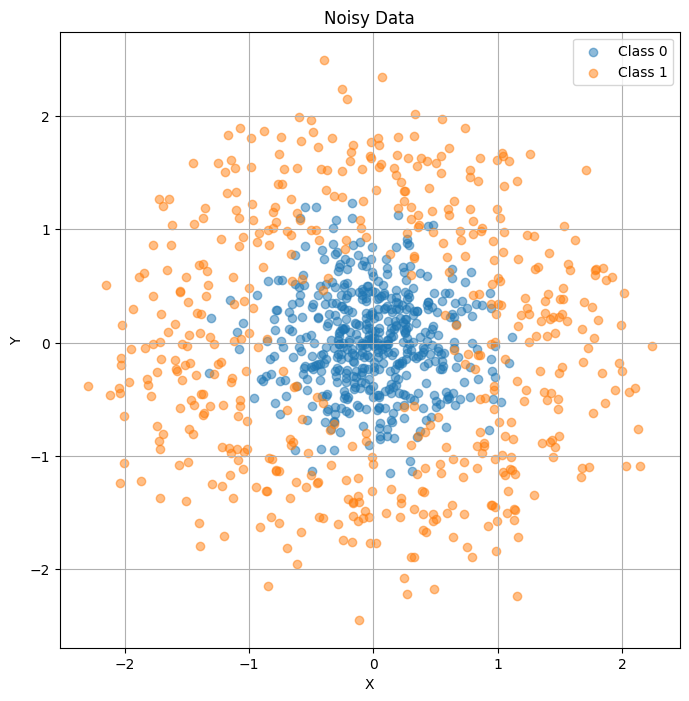

In [78]:
plt.figure(figsize=(8, 8))
plt.scatter(X_train_noisy[y_train == 0][:, 0], X_train_noisy[y_train == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X_train_noisy[y_train == 1][:, 0], X_train_noisy[y_train == 1][:, 1], label='Class 1', alpha=0.5)
plt.legend()
plt.title('Noisy Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

К этим данным примените третью модель.

In [79]:
model_3.fit(X_train_noisy, y_train, epochs=10, batch_size=32)
loss, accuracy = model_3.evaluate(X_train_noisy, y_train)

print()
print(f'Model 3 Accuracy with Noise: {accuracy}')

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8521 - loss: 0.4418 
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8930 - loss: 0.4147 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9214 - loss: 0.3804 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9198 - loss: 0.3734 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9154 - loss: 0.3580 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9135 - loss: 0.3457 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8998 - loss: 0.3349 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9135 - loss: 0.3152 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9089 - loss: 0.3128 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: 0.3037 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9115 - loss: 0.3086 

Model 3 Accuracy with Noise: 0.9120000004768372


Теперь решите задачу классификации для датасета MNIST. Загрузите его любым удобным способом и обучите FC-модель. Точность выше 90% считается удовлетворительной.

In [80]:
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

X_train_mnist = X_train_mnist.reshape(-1, 28*28) / 255.0
X_test_mnist = X_test_mnist.reshape(-1, 28*28) / 255.0

y_train_mnist = to_categorical(y_train_mnist, 10)
y_test_mnist = to_categorical(y_test_mnist, 10)

In [83]:
model_mnist = Sequential([
    Input(shape=(28*28,)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_mnist.fit(X_train_mnist, y_train_mnist, epochs=10, batch_size=32)
loss, accuracy = model_mnist.evaluate(X_test_mnist, y_test_mnist)

print()
print(f'MNIST Model Accuracy: {accuracy}')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 787us/step - accuracy: 0.8386 - loss: 0.5744
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - accuracy: 0.9379 - loss: 0.2174
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.9544 - loss: 0.1604
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.9637 - loss: 0.1262
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.9674 - loss: 0.1102
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.9708 - loss: 0.0990
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - accuracy: 0.9733 - loss: 0.0917
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.9765 - loss: 0.0800
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.9790 - loss: 0.0697
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.9789 - loss: 0.0677
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.9622 - loss: 0.1306

MNIST Model Accuracy: